# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,85,20959,45828,36,24231,1423
1,3067,13240,23127,3941,9959,731
2,6633,2096,4563,1389,1860,1892


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
65     1.6  96.1     99.1     0.7              99.3          65.7
200   24.3  91.8     94.5    77.7              94.1          41.4
410   42.5  33.9     48.2    47.3              63.6          77.3


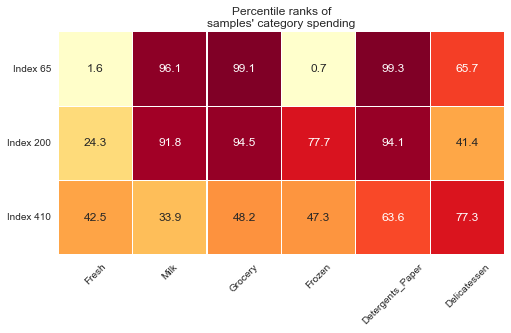

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [65, 200, 410]


# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap as suggested by reviewer 1
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Assumptions:

 - *Fresh*: Fresh fruits and vegatables
 - *Milk*: Milk and dairy products.
 - *Grocery*: All packaged food items not labeled fresh, frozen, or delicatessen
 - *Frozen*: Pre-packaged frozen products
 - *Detergents_Paper*: Detergents and washing up liquids, and paper products (paper plates, napkins, etc.)
 - *Delicatessen*: Ready to eat coldcut meats and cheeses.
 
|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 0	| 85 | 20959 | 45828 | 36 | 24231 | 1423 |

The first sample above, fresh fruits and vegatables and frozen categories are purchased at a bare minimum, while dairy, grocery, detergents_paper categories are all purchased above 75% in the distribution.  We believe this customer represents a very well off coffee and cafe or chain based on the statistics in the dataset, since the product that they do purchase are mostly above 75% of all other customers profiled.  Assumptions:  coffee houses needs a lot of milk and coffee beans (which I assume to be in the Grocery category), paper and detergents for cleaning up, a smell deli section for making sandwiches for customers to snacks on while drinking their coffee.


|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 | 3067 | 13240 | 23127 | 3941 | 9959 | 731 |

The second sample above, seems to be almost the same as the first sample, but just half the amount purchased in each of those main categories with the exception of fresh fruits and vegatables and frozen products.  But even halfed, the amount of diary, grocery and detergents_paper products are above 50% purchased of other customers.  In addition, fresh fruits and vegatables are purchased just below 25%, and frozen products are purchased above 75% of all other customes.  We believe this customer represents a restaurant or chain that serves salads, sandwiches, hot foods, beverages and deserts.

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 2 | 6633 | 2096 | 4563 | 1389 | 1860 | 1892 |

The third sample above, seems to purchase from every category, but the amount purchased are in the 25%-50% tile range in the distribution with the exception of detergents_paper and delicatessen category.  This makes us think that this is a small sandwich shop or even a consumer customer, since it does not make sense otherwise to have more coldcut meats and cheeses than a normal restaurent or coffee house.

**NOTE:**

As a follow up suggestion from a reviewer of the draft proposal, we implemented a heatmap to view the category spending percentitle rank of the sample customers to identify possible skew in the dataset.  As can be seen, the first two samples have an off the chart category spending in the 90 percentile range, which seems indicate they are in a different customer segment than the third sample.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
range_target_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

for target_feature in range_target_features:
    y_target = data[target_feature]
    new_data = data.drop([target_feature], axis = 1, inplace = False)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, y_target, test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "score is {} for {}".format(score, target_feature)

score is -0.252469807688 for Fresh
score is 0.365725292736 for Milk
score is 0.602801978878 for Grocery
score is 0.253973446697 for Frozen
score is 0.728655181254 for Detergents_Paper
score is -11.6636871594 for Delicatessen


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

We attempted to predict all six of the target features and the resulting prediction scores are shown below.

|  | Fresh | Milk | *Grocery* | Frozen | *Detergents_Paper* | Delicatessen |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Score	| -0.252 | 0.366 | **0.603** | 0.254 | **0.729** | -11.7 |

Of the six categories, *Fresh* and *Delicatessen* failed to fit the decision tree learning model.  Of the remaining four categories, *Detergents_Paper* seems to be strongly predictable by all of the other categories with a score of **0.729**, follow closely by *Grocery* with a score of **0.603**.  Since its value can be predicted, their values may not be necessary to identify the customers' spending habits.  The other remaining two categories, *Milk* and *Frozen* have scores of 0.366 and 0.254 respectively.  They do not have strong correlations with the other categories, and we believe should be necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

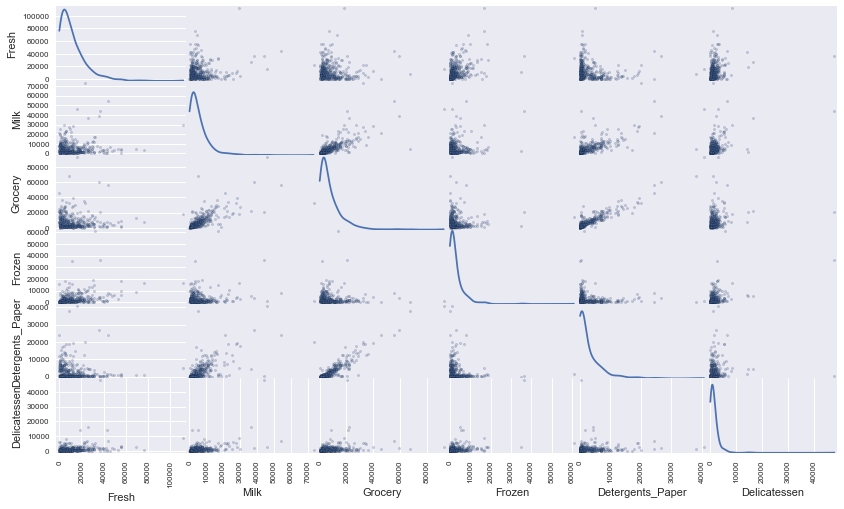

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

All of the features appears to be *Skewed right (positive)*, with the majority data points landing towards the right of the mode and a long tail left, with the exceptions of *Detergent_Paper* and *Grocery* category pairs, which has an almost symmetric (normal) distribution across the x and y axis centering on the mode (see diagram on terminology for skewness of the distributions below).  This pair is follow by the *Grocery* and *Milk* and *Detergent_Paper* and *Milk* category pairs.  This confirms our suspicions about the relevence of the *Grocery* and *Detergent_Paper* categories being correlated and that *Milk* and *Frozen* categories could be used to for identifying customers' spending habits.

<img src="https://udacity-github-sync-content.s3.amazonaws.com/_imgs/29/1463303240/Screenshot_2016-05-15_at_11.06.51_AM.png" title="The terminology for skewness of the distributions">


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

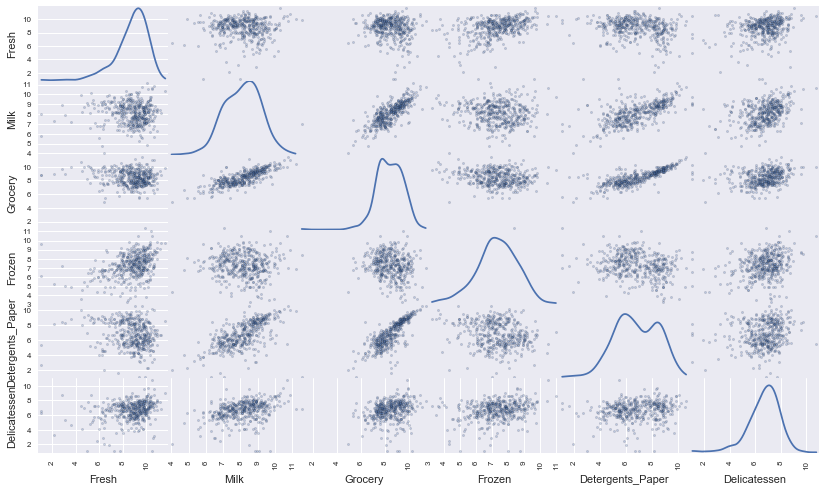

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.799812,7.647786,8.425736,7.236339,7.528332,7.545390


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [21]:
# For each feature find the data points with extreme high or low values
feature_outliers = {}
def compare_count(index):
    return feature_outliers[index]['count']

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    for outlier in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        feature_outlier = feature_outliers.get(str(outlier), {'count':0, 'features':[]});
        feature_outlier['count'] += 1
        feature_outlier['features'].append(feature)
        feature_outliers[str(outlier)] = feature_outlier
    
# OPTIONAL: Select the indices for data points you wish to remove
# Generate counting list as suggested by reviewer.
outliers = list(feature_outliers.keys())
outliers.sort(key=compare_count)
for outlier in outliers:
    if feature_outliers[str(outlier)]['count'] > 1:
        print "outlier", outlier, "in", feature_outliers[str(outlier)]['count'], "features: ", feature_outliers[str(outlier)]['features']
outliers = np.array(outliers, np.int32)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


outlier 65 in 2 features:  ['Fresh', 'Frozen']
outlier 66 in 2 features:  ['Fresh', 'Delicatessen']
outlier 75 in 2 features:  ['Grocery', 'Detergents_Paper']
outlier 128 in 2 features:  ['Fresh', 'Delicatessen']
outlier 154 in 3 features:  ['Milk', 'Grocery', 'Delicatessen']


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are data points considered outliers for more than one feature.  They are:

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 65 | x |  |  | x |  |  |
| 66 | x |  |  |   |  | x |
| 75 |   |  | x |  | x |  |
| 128 | x |  |   |  |   | x |
| 154 |  | x | x |  |  | x |

With 154 having the most outlying features with *Milk*, *Grocery* and *Delicatessen*.  They should be removed from the dataset since they are outside of the expected range and skewing the analysis for our attempt to cluster the data to split the customers into segments.  Any data points that are added to the outliers list should be removed from our data points, since we are applying an additional 1.5 basis on the Interquartile Range (IQR), so are not as aggressive as applying the cutoffs at outside of the (Q1-IQR,Q3-IQR) range, but instead outside of the (Q1-IQR\*1.5, Q3+IQR\*1.5) range.  Removing the outliers will allow us to more easily cluster the dataset features and hopefully reduce dimensionality using *Principal Component Analysis* (PCA) or *Independent Components Analysis* (ICA) Feature Transformations.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA dimensions 1&2 cumulative sums:  0.7252
PCA dimensions 1,2,3&4 cumulative sums:  0.9279


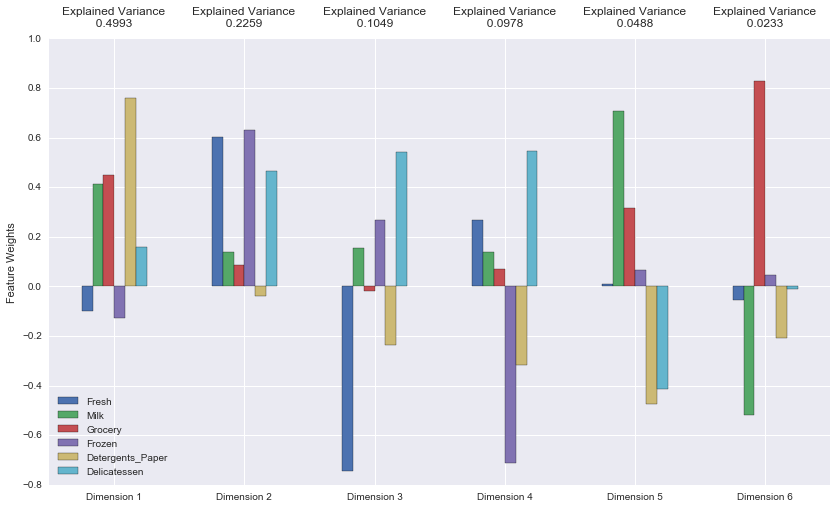

In [33]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# Print cumulative sums of the variances explained by the PCA as suggested by reviewer.
print "PCA dimensions 1&2 cumulative sums: ", pca_results['Explained Variance'].cumsum()[1]
print "PCA dimensions 1,2,3&4 cumulative sums: ", pca_results['Explained Variance'].cumsum()[3]

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The total variance in the data as explained by the first and second principal components is at 72.52%.  With the addition of the third and fourth principal components, which is around 10% each, the total variance in the data is at 92.79%.  We now understand that the PCA dimensions represent *patterns of spending* instead of actual *customers, or customer segments* and can both follow (positive values) and go against (negative values) the direction of the feature weights.


For example, the first component (dimension 1 in the diagram), which makes up the majority (49.93%), represents a pattern of above average spending on **Milk, Grocery and Detergents_Paper** features/products.  Customers with *High* values in this component purchase a lot in these three features, while those with *Low* values in the component purchase very little.

The second principal component (dimension 2 in the diagram), which makes up the second highest spending pattern (22.59%), represents a pattern of above average spending on **Fresh, Frozen and Delicatessen** features/products.  Customers with *High* values in this component purchase a lot in these three features, while those with *Low* values in the component purchase very little.

The third principal component (dimension 3 in the diagram), which makes up 10.49% of spending patterns, represents a pattern of above average spending on **Delicatessen, Frozen and milk** features/products, but more interestingly, way below average spending on **Fresh and Detergents_Paper**.  Customers with *High* values in this component purchase a lot of **Delicatessen, Frozen and milk** and avoid purchasing **Fresh and Detergents_Paper**, while those with *Low* values in the component do not follow this spending pattern.

The fourth principal component (dimension 4 in the diagram), which makes up 9.78% of the spending patterns, represents a pattern of above average spending on **Delicatessen and Fresh** features/products, but more interestingly, way below average spending on **Frozen and Detergents_Paper**.  Customers with *High* values in this component purchase a lot of **Delicatessen and Fresh** and avoid purchasing **Frozen and Detergents_Paper**, while those with *Low* values in the component do not follow this spending pattern.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [32]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.3109,-4.5845,2.0274,1.1669,-0.0343,0.3363
1,3.0820,0.1314,0.3994,-1.4197,0.4747,0.2263
2,0.5266,0.0510,0.2044,0.2087,-1.0045,0.0881


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

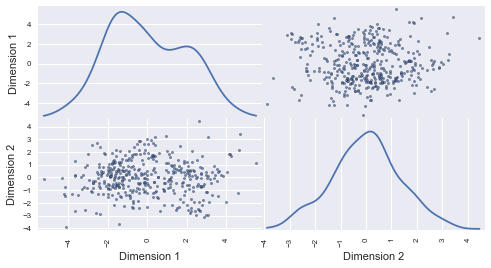

In [34]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Produce a scatter matrix for each pair of newly-transformed features as suggested by reviewer
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [35]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.3109,-4.5845
1,3.0820,0.1314
2,0.5266,0.0510


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

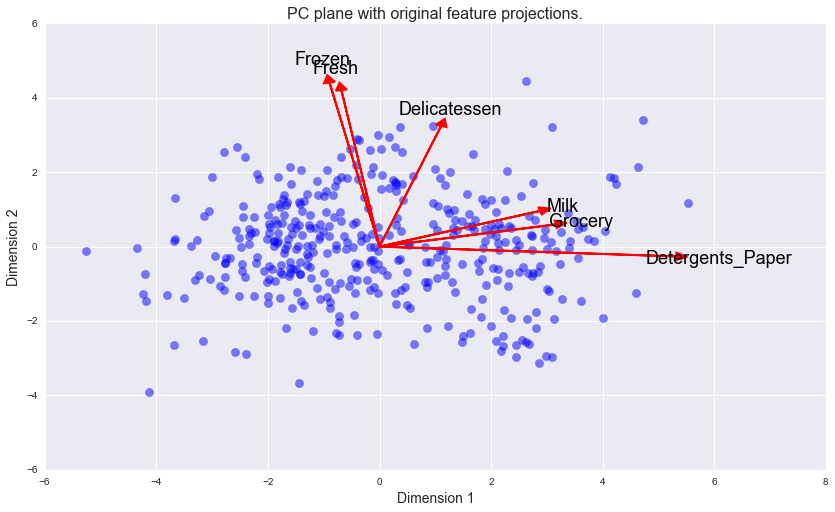

In [36]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The advantage of K-Means clustering algorithm is it is simple to understand, fast and more scalable.  K in the K-Means clustering algorithm specifies how many clusters there are in the dataset (K).  It is based on initializing the K clusters based on a center point for each of the clusters.  The idea is that the cluster center will naturally migrate to the center of its members given the dataset over multiple iterations as the cluster are recentered based on its point memberships; however, the output for any fixed training set will not always give you the same clustering results since it is very dependent on where the algorithm starts its cluster centers, assuming symmetrical/spherical shapes in the data distributions in the cluster.  Poorly placed initial cluster centers will cause bad local minimal for the cluster results.  In addition, K-Means clustering algorithm is purely based on the cluster centers, so any two center points that are close together will fight over the ownership of their points, since points in a K-Means cluster cannot be shared (hard assignment of points to cluster).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/KMeans-Gaussian-data.svg/434px-KMeans-Gaussian-data.svg.png" title="K-Means separates data into clusters" width="600" height="400">

<img src="https://i.ytimg.com/vi/_aWzGGNrcic/hqdefault.jpg" title="K-Means clustering fighting over point membership" width="600" height="400">

The advantages of Gaussian Mixture Model (GMM) cluster algorithm is more flexible than K-Means by using soft assignments of points to cluster.  It allows for mixed membership of points in more than one cluster by using probability surfaces for a point to belong to a mixture of clusters, assuming elliptical shapes in the data distributions in the cluster.  The following diagram shows probabilities for 4 clusters, 2 in close proximity.

<img src="http://4.bp.blogspot.com/-zuCQBrN8990/VGt45PZHXhI/AAAAAAAAA1E/jtQQaAj-PMc/s1600/gmm2.png" title="Gaussian Mixture Model with probability grediants" width="600" height="400">

The main disadvantage of GMM is that the algorithm needs a sufficiently many data points in the dataset per cluster to converge and find a solution (probabilities of points belonging to clusters); otherwise, it will diverge and find solutions with infinite likelihood unless it is constraint in someway.  So, if a low sample dataset is given to a GMM, it may be slow to converge to the given number of cluster, or not converge at all, due to low probabilities of the given number of clusters assigned.

I believe this disadvantage should be managable given the amount of data points we have in our dataset and given the data that we see in our 2 dimensional biplot above, a density cluster using probability is a better method to create our clusters than K-Means.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

For GMM of n_clusters = 6 , the silhouette_score = 0.250286595942


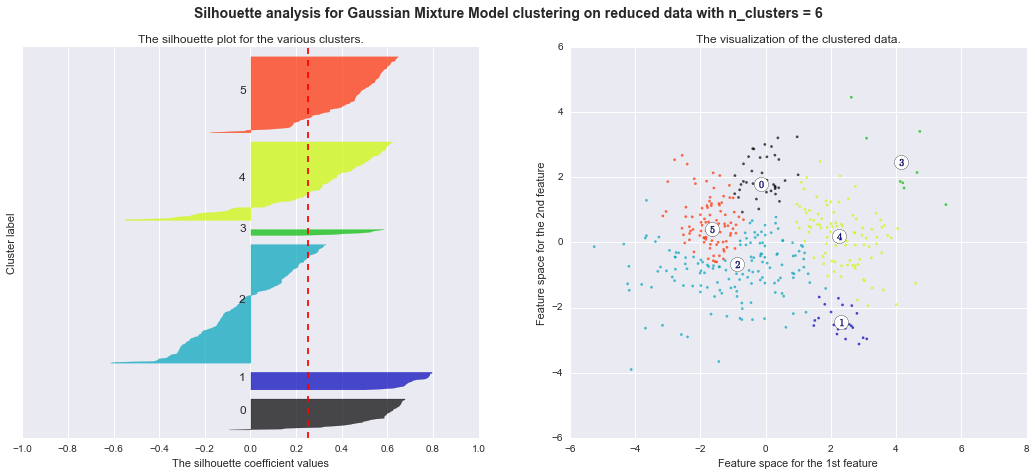

For GMM of n_clusters = 5 , the silhouette_score = 0.313056565177


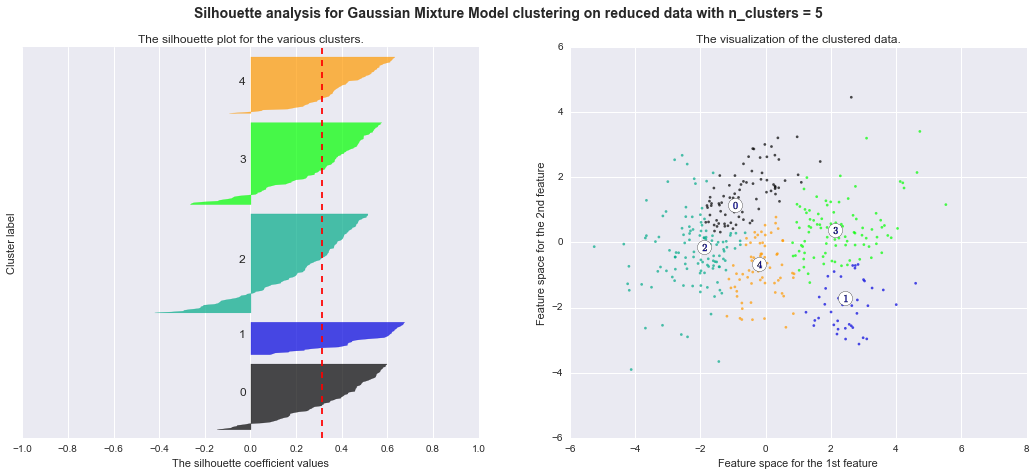

For GMM of n_clusters = 4 , the silhouette_score = 0.307028347261


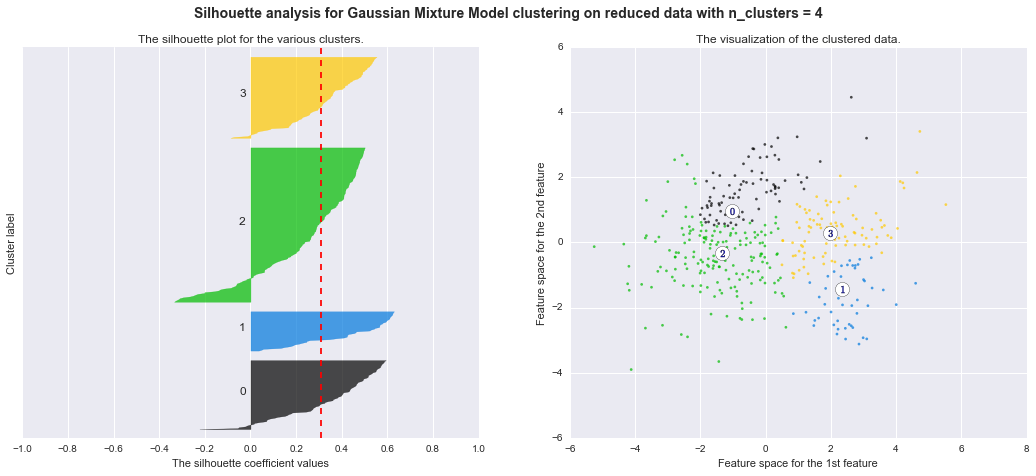

For GMM of n_clusters = 3 , the silhouette_score = 0.361193625039


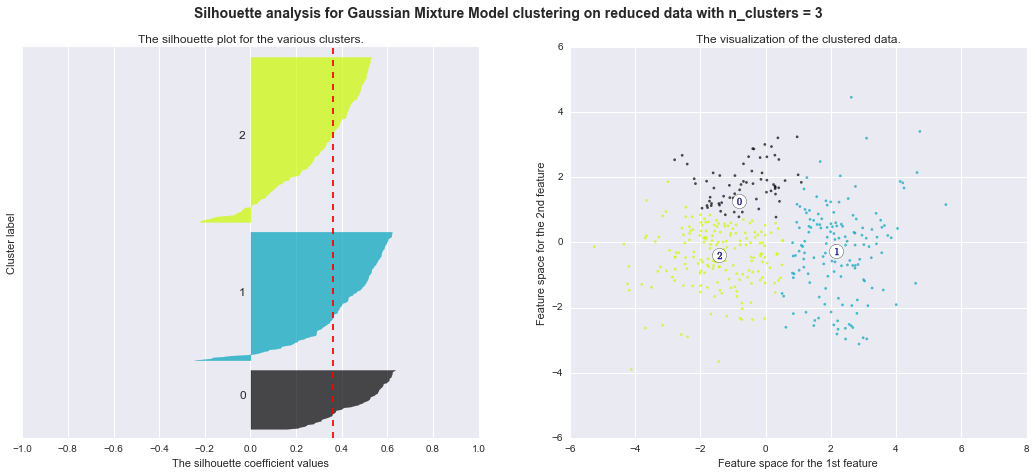

For GMM of n_clusters = 2 , the silhouette_score = 0.446753526945


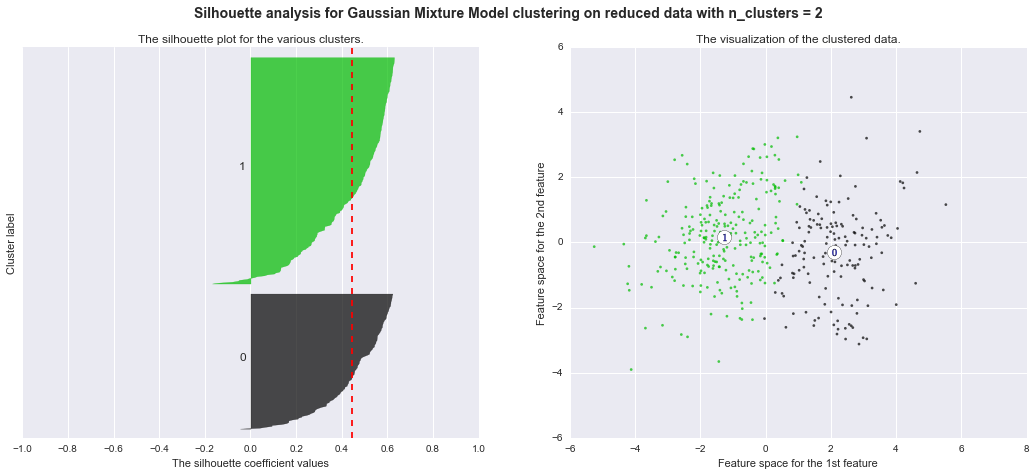

In [37]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [6, 5, 4, 3, 2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 clumns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1.0, 1.0])
    
    # The (n_cluster+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim(0, len(reduced_data) + (n_clusters+1)*10)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    # centers = clusterer.cluster_centers_ - only for KMeans - means_ is the center for GMM.
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print "For GMM of n_clusters =", n_clusters, ", the silhouette_score =", score
    
    # Compute the silhouette scrores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, preds)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(preds.astype(float) / n_clusters)
    ax2.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Gaussian Mixture Model clustering on reduced data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()



### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

We tried cluster numbers from 6 to 2.  Below is a table that summarizes the results as well as graphical representations shown above.  Of the cluster numbers we tried, 2 has the best silhouette score of 0.446753526945.

| Cluster Number | Silhouette Score |
|:----:|:----:|
| 2 | 0.446753526945 |
| 3 | 0.361193625039 |
| 4 | 0.307028347261 |
| 5 | 0.313056565177 |
| 6 | 0.250286595942 |

As the summaries show, we generally got better silhouette scores as we reduced the number of clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

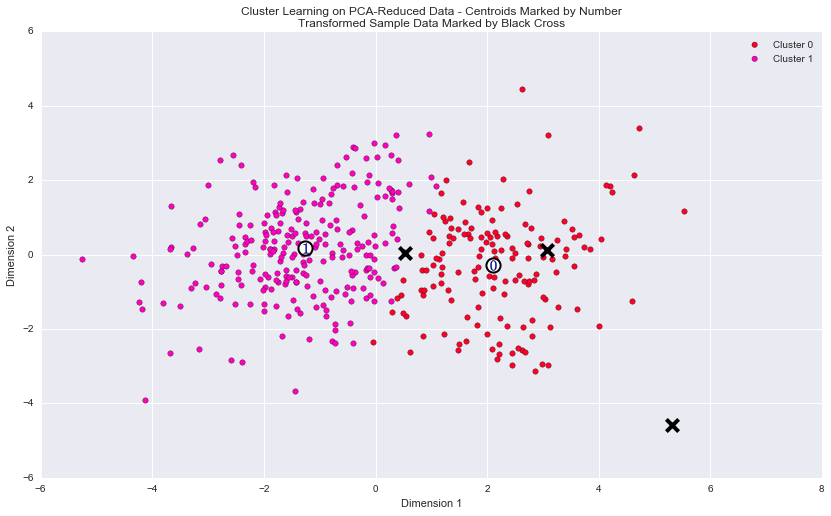

In [38]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [39]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Display a description of the good dataset
print "\nGood Dataset Statistics with outliers removed."
display(np.exp(good_data).describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0
Segment 1,9494.0,2049.0,2598.0,2203.0,337.0,796.0



Good Dataset Statistics with outliers removed.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.00000
mean,12430.630653,5486.314070,7504.907035,3028.809045,2725.376884,1454.71608
std,12552.698266,6410.878177,9263.803670,3712.563636,4644.023066,1746.45365
min,255.000000,201.000000,223.000000,91.000000,5.000000,46.00000
25%,4043.500000,1597.250000,2125.000000,830.000000,263.250000,448.25000
50%,9108.000000,3611.500000,4573.000000,1729.500000,788.000000,997.50000
75%,16969.000000,6802.500000,9762.250000,3745.000000,3660.500000,1830.00000
max,112151.000000,54259.000000,92780.000000,35009.000000,40827.000000,16523.00000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Looking at the good_data statistics with the outliers removed, we see that Segment 0 seems to represent customers that purchase large quantities **More than Q3 (75th percentile of the data)** for *grocery*, *milk* and *detergents/paper* products.  We believe these are either restaurants, coffee houses, or dinners.  Segment 1 seems to represent customers that purchase large quantities of *fresh fruit and vegatables* and *frozen* products **More than Q2 (50th percentile of the data)**; however, overall, they do not purchase as much as Segment 0.  We believe they are purhaps consumers customers that would like to reduce their expenses by purchasing in bulk.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
65     1.6  96.1     99.1     0.7              99.3          65.7
200   24.3  91.8     94.5    77.7              94.1          41.4
410   42.5  33.9     48.2    47.3              63.6          77.3


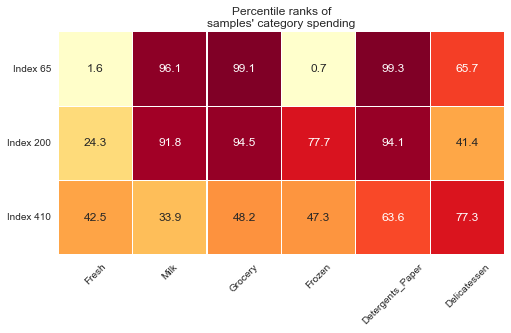

In [42]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print "\n", pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

**Answer:**

For the 3 samples that we picked earlier, sample points 1 and 2 are placed in **customer segment 0**, which have high **Milk, Grocery and Detergents_Paper** feature spending patterns.  This is consistant for sample 1 and 2, since they also purchase high quantities of **Milk, Grocery and Detergents_Paper** products as can be seen in the Percentile ranks heatmap.  In addition, if we look at the cluster chart above we find that sample 1 and 2 are closer in distance to the predicted center of cluster 0 than 1 which match the prediction.  Sample point 3 is placed in **customer segment 1**, which have high **Fresh, Frozen and Delicatessen** feature spending patterns.  This is also consistant with what we predicted before, since sample 3 also purchase high quantities of **Fresh, Frozen and Delicatessen** according to the heatmap.  While the cluster chart above has sample 3 mid way between cluster 0 and 1, we believe the correct cluster was chosen by the GMM since not enough **Milk** feature was purchased for sample 3 to be included in cluster 0.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We believe running A/B tests are great for testing small changes to see how effective they are before rolling it out of different customer segments because changes like reduced delivery schedule may affect different customer segments differently.  In particular, we believe purchasers of perishable goods, such as *milk*, and *grocery* products are more likely to require more frequent deliveries, since their storage may only handle a day of food, and since customer segment 0 is the majority purchasers of these products, we would recommend that they be not place on this new delivery schedule.  Customer segment 1 purchase these items in less quantity (25-50%), so may have a less sensitive reaction to the new delivery schedule.  However, those are just guesses, and an effective A/B testing program will be able to statistically prove if changing the delievery service will make different customer segments react positively or negatively to the change, or none at all.  This can be done by randomly selecting a sample set of customers from each customer segment and apply the new delivery services as they are designed.  Their feedback on the new services will dictate if the services should be rolled out on other customers of the same segments depending on if the service is successful with the A/B testing group.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can use the trained GMM to generate/predict the customer's segment as a basis for the training labels on the supervised learner.  This concept is called **feature engineering**, and will use the output of an unsupervised learning analysis as input to a new supervised learning analysis.  Once trained on the existing customer dataset using the new labels, the new supervised learner can be used to predict new customers based on their estimated product spending.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

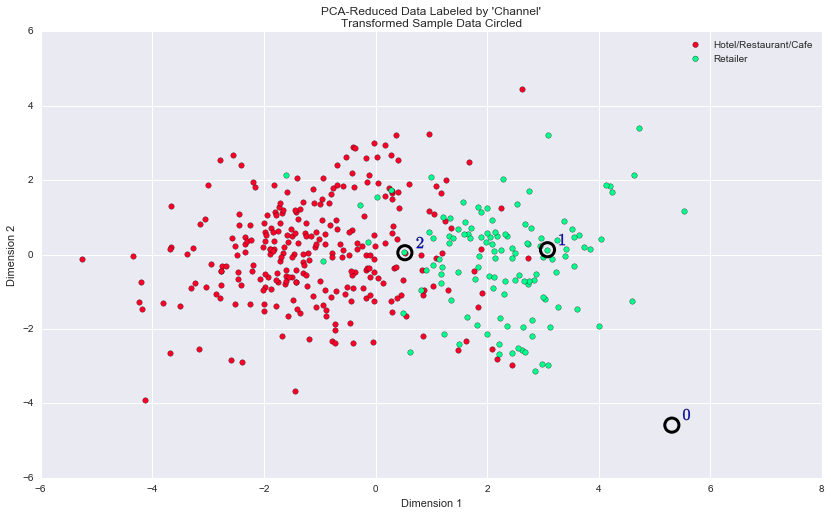

In [43]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering results from the Gaussian Mixture Model algorithm predicted the cluster correctly as 2, but it appears that the distribution of *Retailers* and *Hotels/Restaurants/Cafes* are more mixed than GMM predicted.  On the whole, the 2 clusters predicted by the GMM maps correctly to the Channel label.  Our previous definition of the customer segments does not quite fit with these classification.  Our model did not include retailers such as grocery stores that customer segment 0 seems to belong, and segment 1 is now the restaurant, hotel and cafe we previously considered to be segment 0.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.